In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [9]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [10]:
# ## loading training set
# training_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     '../capstone1/datasets/plant/archive (3)//New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
#     seed=42,
#     image_size= (img_height, img_width),
#     batch_size=batch_size

# )

In [11]:
# loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../capstone1/datasets/plant/archive_win/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 69079 files belonging to 37 classes.


In [12]:
# loading training set
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../capstone1/datasets/plant/archive_win/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 17068 files belonging to 37 classes.


In [13]:
class_names = training_ds.class_names
print(class_names)

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


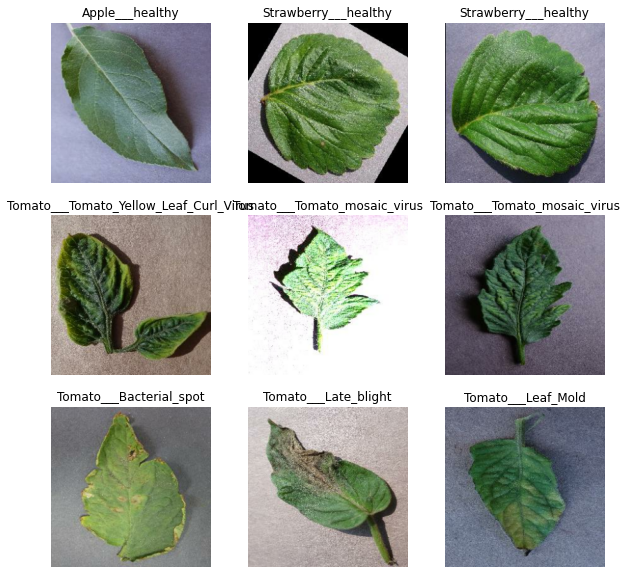

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
## Defining Cnn
classifier = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [26]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## lets train our CNN
retVal = classifier.fit(training_ds, validation_data= validation_ds, epochs = 20)

Epoch 1/20
691/691 [==============================] - 5128s 7s/step - loss: 1.7182 - accuracy: 0.5720 - val_loss: 0.4042 - val_accuracy: 0.8719
Epoch 2/20
691/691 [==============================] - 5147s 7s/step - loss: 0.3592 - accuracy: 0.8869 - val_loss: 0.3057 - val_accuracy: 0.9050
Epoch 3/20
691/691 [==============================] - 5220s 8s/step - loss: 0.2135 - accuracy: 0.9321 - val_loss: 0.3220 - val_accuracy: 0.9049
Epoch 4/20
691/691 [==============================] - 5690s 8s/step - loss: 0.1339 - accuracy: 0.9558 - val_loss: 0.2791 - val_accuracy: 0.9218
Epoch 5/20
691/691 [==============================] - 5681s 8s/step - loss: 0.0980 - accuracy: 0.9669 - val_loss: 0.2292 - val_accuracy: 0.9363
Epoch 6/20
691/691 [==============================] - 5710s 8s/step - loss: 0.0607 - accuracy: 0.9803 - val_loss: 0.2554 - val_accuracy: 0.9339
Epoch 7/20
691/691 [==============================] - 5878s 9s/step - loss: 0.0650 - accuracy: 0.9784 - val_loss: 0.2795 - val_accuracy:

In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

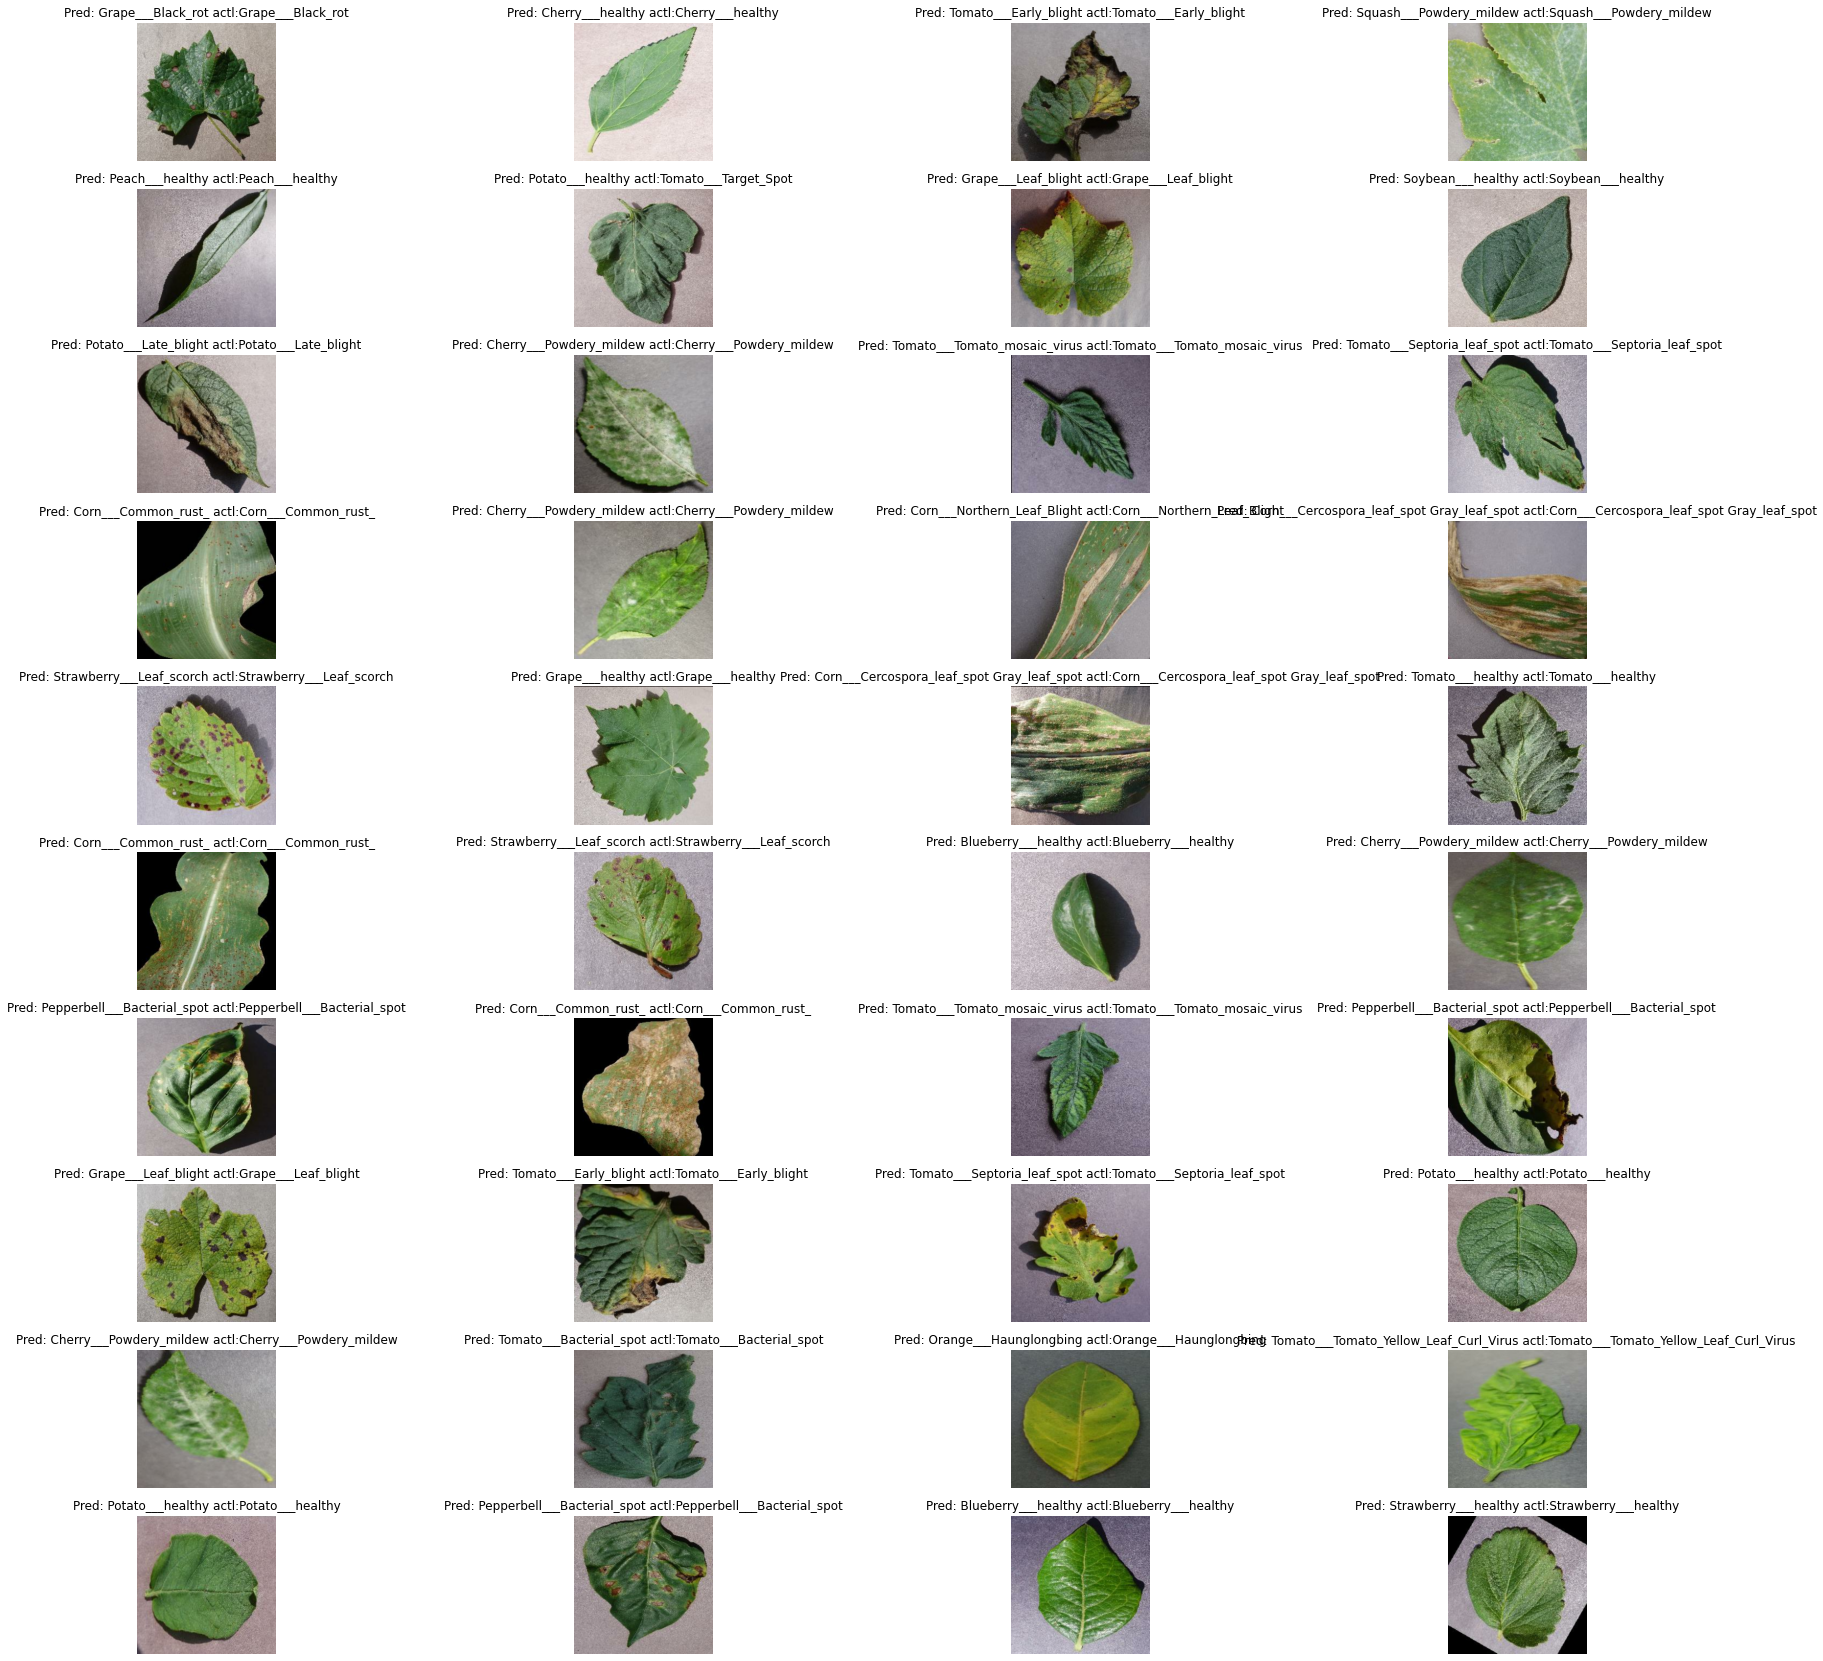

In [19]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

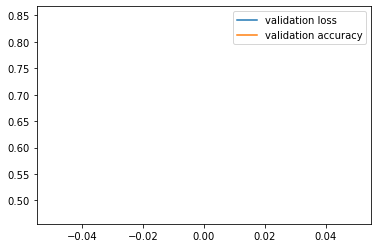

In [20]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [21]:
classifier.save('./models/classifier.h5')

In [18]:
#####################################################################
# lets now see time taken and validation accuracy and model size    #
#####################################################################
start = perf_counter() 
_, unPrunnedAccuracy = MyCnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizeUnprunned = os.path.getsize('model.h5')
# let convert to MB
sizeUnprunned = sizeUnprunned / (1024 * 1024)

print ('unPrunned model Summary:')
print('Model size(MB) : {}'.format(sizeUnprunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(unPrunnedAccuracy))

unPrunned model Summary:
Model size(MB) : 316.51051330566406
Time on Validation data (sec) : 18.235865999999987
Accuracy on validation data: 0.5385385155677795


In [19]:
########################################################################
# lets now implement weight prunning                                   #
########################################################################
!pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

epochs = 5
end_step = np.ceil(70295 / batch_size).astype(np.int32) * epochs
## pruning param
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50, final_sparsity=0.80, begin_step=0, end_step=end_step)
                }
## defining prunned model
MyPrunnedModel = prune_low_magnitude(MyCnn, **pruning_params)
MyPrunnedModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [20]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir='.'),
]
retVal = MyPrunnedModel.fit(training_ds,validation_data= validation_ds,epochs = 5 ,callbacks= callbacks)

Epoch 1/5
45/45 [==============================] - 344s 7s/step - loss: 0.3912 - accuracy: 0.8587 - val_loss: 0.2588 - val_accuracy: 0.8929
Epoch 2/5
45/45 [==============================] - 340s 8s/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 0.1298 - val_accuracy: 0.9530
Epoch 3/5
45/45 [==============================] - 352s 8s/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 4/5
45/45 [==============================] - 332s 7s/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0171 - val_accuracy: 0.9920
Epoch 5/5
45/45 [==============================] - 349s 8s/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0116 - val_accuracy: 0.9960


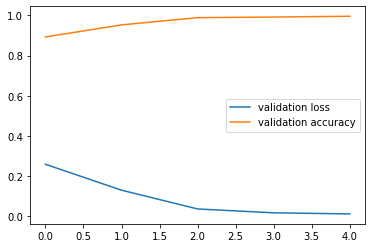

In [21]:
#################################################################
# let Benmark this as above                                     #
#################################################################
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

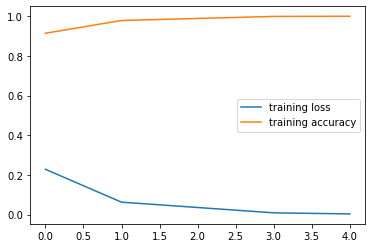

In [22]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [23]:
MyPrunnedModel.save('Prunnedmodel.h5')

In [24]:
start = perf_counter() 
_, PrunnedAccuracy = MyPrunnedModel.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizePrunned = os.path.getsize('Prunnedmodel.h5')
# let convert to MB
sizePrunned = sizePrunned / (1024 * 1024)

print ('Prunned model Summary:')
print('Model size(MB) : {}'.format(sizePrunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(PrunnedAccuracy))

Prunned model Summary:
Model size(MB) : 422.01830291748047
Time on Validation data (sec) : 17.077646699999605
Accuracy on validation data: 0.9959959983825684


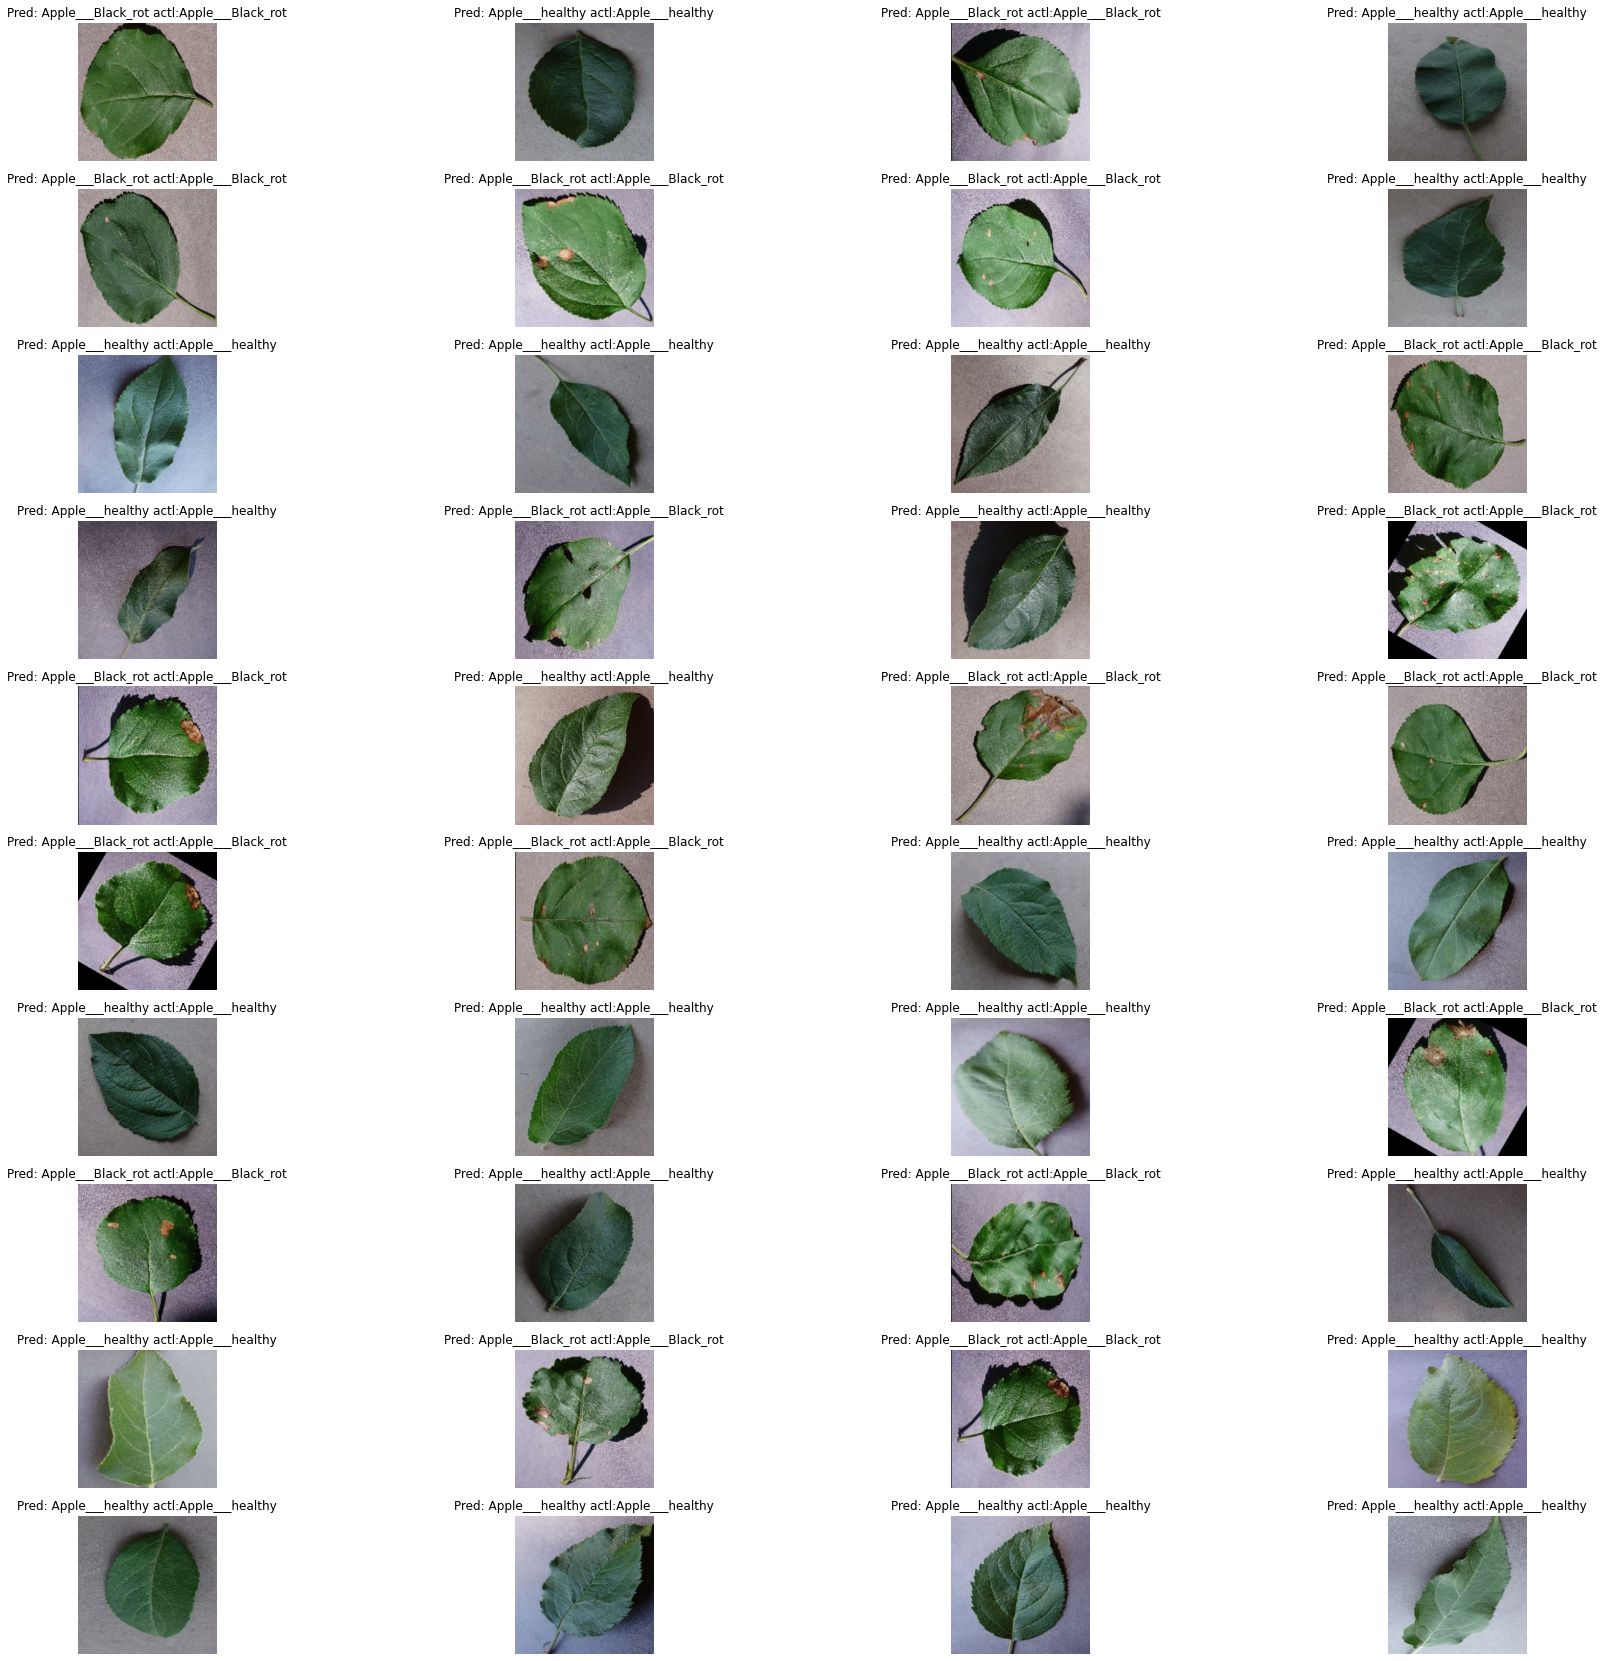

In [25]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyPrunnedModel.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)